# Coursework 3

Problems are set by Dr. Wei Dai, 2022

Check the lecture notes for the steps of ADMM and the stopping criteria. 

In [ ]:
using DataFrames, FFTW, Wavelets, Images, LinearAlgebra, Random, StatsBase

# Make sure that you complete the involvement table. 
# The first row is for CID number. 
# Other rows are for the involvement for each "big" problem (8 big problems in coursework 1). 
# "1" for getting involved in this part. 
# "0" for not involved
Contributions = DataFrame( A=[1234,0,0,0,0], B = [1234,0,0,0,0] )

## 1. Netflix Problem (40%)

The $\texttt{ratings.csv}$ is MovieLens data downloaded from [GroupLens](grouplens.org).

### 1.1 Prepare the data (6%)

1. Use the package $\texttt{xlsx.jl}$ or $\texttt{csv.jl}$ to read $\texttt{ratings.csv}$. Using the existing movie rating data to form a matrix $\bm{X}_0$, where the rows correspond to users and the columns correspond to movies. Note that for our purposes, we delete all the movies that have less than 15 ratings.$\newline$ Show the size of your matrix $\bm{X}_0$. Denote its size by $M \times N$.        

2. Based on your obtained $\bm{X}_0$, define 
        $$\begin{align*}
            \Delta & := \left\{(m,n):~ \text{a rating exists for the $m$-th user and $n$-th movie}  \right\}. 
        \end{align*}$$
        In Julia, we use $\texttt{Delta = Array{Int64,2}(undef,0,2)}$ to initialize $\Delta$. $\newline$ Find $\Delta$ ($\texttt{Delta}$ in Julia). Show the size of $\texttt{Delta}$. 
        
3. Use $\texttt{Random.seed!(1234)}$ to initialize the seed for random number generator. Use $\texttt{StatsBase.sample}$ to sample (without replacement) 80\% of the entries in $\texttt{Delta}$ to form $\texttt{Omega}$ ($\Omega$). (Use $\texttt{ceil}$ function to calculate the size of $\Omega$.)
$\newline$
Write a function $\texttt{pOmega}$ to obtain $\bm{y} = \mathcal{P}_{\Omega}(\bm{X}_0)$. 
$\newline$
The vector $\bm{y}$ contains our training data. The vector $\bm{y}_e = \mathcal{P}_{\Delta \backslash \Omega}(\bm{X}_0)$ gives the test data for performance evaluation. 
$\newline$
Find both $\bm{y}$ and $\bm{y}_e$. 


### 1.2 Employ alternating optimization algorithm (10%)

In this part, we are solving $$\begin{align*}
        & \min_{\bm{X}}~ \delta\left( \text{rank}(\bm{X}) \le 10 \right)
        + \frac{1}{2} \lVert \bm{y} - \mathcal{P}_{\Omega}(\bm{X}) \rVert_2^2
    \end{align*}$$
using alternating minimization. More specifically, let $\bm{L} \in \mathbb{R}^{M \times 10}$ and $\bm{R} \in \mathbb{R}^{N \times 10}$. We solve 
$$\begin{align*}
    & \min_{\bm{L},\bm{R}}~ \lVert \bm{y} - \mathcal{P}_{\Omega}(\bm{L} \bm{R}^{\mathsf{T}}) \rVert_2^2
\end{align*}$$
in an alternating way.

1. Implement the alternating minimization algorithm. Test it with randomly initialized $\bm{L}$ and $\bm{R}$ using $\texttt{randn(Float64,M,10)}$ and $\texttt{randn(Float64,N,10)}$ respectively. Denote the output of your alternating minimization algorithm $\hat{\bm{X}}$. 

2. Find the training performance $\lVert \mathcal{P}_{\Omega} (\hat{\bm{X}} - \bm{X}_0)\rVert_2^2 / |\Omega|$ and the prediction performance $\lVert \mathcal{P}_{\Delta \backslash \Omega} (\hat{\bm{X}} - \bm{X}_0)\rVert_2^2 / |\Delta \backslash \Omega|$. 

### 1.3 Employ proximal gradient method (10%)

In this part, we are solving $$\begin{align*}
        & \min_{\bm{X}}~ \lambda \lVert \bm{X} \rVert_*
        + \frac{1}{2} \lVert \bm{y} - \mathcal{P}_{\Omega}(\bm{X}) \rVert_2^2
    \end{align*}$$
    where $\lambda>0$ is chosen so that your result $\hat{\bm{X}}$ has a rank close to 10 (all the singular values except the first 10 ones are close to 10). More specifically, use the proximal gradient method to solve the above convex optimization problem. 

1. Give the closed form of the gradient of the term $\frac{1}{2} \lVert \bm{y} - \mathcal{P}_{\Omega}(\bm{X}) \rVert_2^2$ in terms of $\mathcal{P}_{\Omega}$ and $\bm{X}$.
        
2. Implement the proximal gradient method. 
        
3. Find an appropriate value for $\lambda >0$. Test the training performance and the prediction performance.

### 1.4 Employ ADMM (14%)

A more practical approach is to solve the following constrained optimization problem 
    $$\begin{align*}
        \min_{\bm{X}}~
        & \lambda \lVert \bm{X} \rVert_*
        + \frac{1}{2} \lVert \bm{y} - \mathcal{P}_{\Omega}(\bm{X}) \rVert_2^2 \\
        \text{s.t.}~
        & 0 \le X_{m,n} \le 5,~ \forall~1 \le m \le M,~ 1 \le n \le N. 
    \end{align*}$$
We simplify the notation by writing $0 \le \bm{X} \le 5$ for the constraint.

We use ADMM to solve the constrained optimization problem. An ADMM Lagrangian is given by 
$$\begin{align*}
    \min_{\bm{X},\bm{Z}}~ 
    & \frac{1}{2} \lVert \bm{y} - \mathcal{P}_{\Omega}(\bm{X}) \rVert_2^2 
    + \lambda \lVert \bm{Z}_1 \rVert_*
    + \delta \left( 0 \le \bm{Z}_2 \le 5 \right) \\
    & + \left\langle \bm{\Lambda}_1,\bm{X}-\bm{Z}_1 \right\rangle
    + \left\langle \bm{\Lambda}_2,\bm{X}-\bm{Z}_2 \right\rangle \\
    & + \frac{\rho}{2} \lVert \bm{X}-\bm{Z}_1 \rVert_F^2 
    + \frac{\rho}{2} \lVert \bm{X}-\bm{Z}_2 \rVert_F^2. 
\end{align*}$$

1. Find the closed form for minimization with respect to $\bm{X}$ for given $\bm{Z}$ and $\bm{\Lambda}$.

2. Find the closed form for minimization with respect to $\bm{Z}$ for given $\bm{X}$ and $\bm{\Lambda}$.         

3. Implement the ADMM procedure. 

4. With properly chosen $\lambda > 0$, test the training performance and the prediction performance. 

## 2. Video Background and Foreground Separation (20%)

In this application, we use the video file $\texttt{demo.avi}$.

### 2.1 Data preparation (5%)

The goal of this step is to form a matrix where each column is a vectorized version of a frame of the video and the number of columns is the number of the frames in the video. Denote the matrix by $\bm{Y}$.

With help from GTA Mr. Zhengang Guo, we have identified that the function $\texttt{VideoIO.load}$ can load the video file and that the function $\texttt{VideoIO.channelview}$ can get frames from the loaded video. 

Write a function $\texttt{video2matrix}$ to form the video matrix $\bm{Y}$ from the video file. 


### 2.2 Employ ADMM (15%)

The video matrix $\bm{Y}$ can be modelled as 
    $$\begin{align*}
        & \bm{Y} = \bm{L} + \bm{S} + \bm{W},
    \end{align*}$$
where $\bm{L}$ is a low rank matrix to represent the background, $\bm{S}$ is a sparse matrix (only a few entries are nonzero) that correspond to moving foreground, and $\bm{W}$ denotes Gaussian noise.

We consider the following constrained optimization problem 
$$\begin{align*}
    \min_{\bm{L},\bm{S}}~ 
    & \frac{1}{2} \lVert \bm{Y} - \bm{L} -\bm{S} \rVert_F^2
    + \lambda_1 \lVert \bm{L} \rVert_* 
    + \lambda_2 \lVert \bm{S} \rVert_1 \\
    \text{s.t.}~
    & 0 \le \bm{L} \le 255,  
\end{align*}$$
where with slight abuse of notation $\lVert \bm{S} \rVert_1 := \lVert \text{vect}(\bm{S}) \rVert_1$. 
    An ADMM optimization formulation is given below. 
$$\begin{align*}
    \min_{\bm{L},\bm{S}, \bm{Z}}~ 
    & \frac{1}{2} \lVert \bm{Y} - \bm{L} -\bm{S} \rVert_F^2
    + \lambda_1 \lVert \bm{Z}_1 \rVert_* 
    + \delta \left( 0 \le \bm{Z}_2 \le 255 \right)
    + \lambda_2 \lVert \bm{Z}_3 \rVert_1 \\
    \text{s.t.}~
    & \bm{L} = \bm{Z}_1,~
    \bm{L} = \bm{Z}_2,~
    \bm{S} = \bm{Z}_3. 
\end{align*}$$

1. Find the closed form for minimization with respect to $(\bm{L},\bm{S})$ for given $\bm{Z}$ and $\Lambda$. 

2. Find the closed form for minimization with respect to $\bm{Z}$ for given $(\bm{L},\bm{S})$ and $\Lambda$. 

3. Implement the corresponding ADMM procedure. 

4. Choose reasonable parameters $\lambda_1$ and $\lambda_2$ to have nice results. Save the estimated $\bm{L}$ and $\bm{S}$ into video files $\texttt{Background.avi}$ and $\texttt{Foreground.avi}$ respectively. (Upload these files when you submit your coursework.)

## 3. MRI Compressed Sensing Recovery (40%)

The following optimization problem can be formulated for MRI compressed sensing recovery. 
$$\begin{align*}
    \min_{\bm{X}}~
    & \frac{1}{2} \lVert \bm{y} - \mathcal{P}_{\Omega}\left( \mathcal{F} \left( \bm{X} \right) \right) \rVert_2^2
    + \alpha \lVert \mathcal{H}(\bm{X}) \rVert_1\\
    & + \beta \lVert \mathcal{D}_1(\bm{X}) \rVert_1
    + \beta \lVert \mathcal{D}_2(\bm{X}) \rVert_1
    + \beta \lVert \mathcal{D}_3(\bm{X}) \rVert_1
    + \beta \lVert \mathcal{D}_4(\bm{X}) \rVert_1 \\
    \text{s.t.}~
    & 0 \le \bm{X} \le 255,
\end{align*}$$
where $\mathcal{H}$ stands for the discrete Haar wavelet transform (See the section Haar matrix at [Wikipedia](https://en.wikipedia.org/wiki/Haar_wavelet). $\mathcal{D}_1(\bm{X})$, $\mathcal{D}_2(\bm{X})$, $\mathcal{D}_3(\bm{X})$, and $\mathcal{D}_4(\bm{X})$ compute $X_{m,n} - X_{m-1,n}$, $X_{m,n} - X_{m,n-1}$, $X_{m,n} - X_{m-1,n-1}$, $X_{m,n} - X_{m-1,n+1}$, respectively, for all valid $m,n$ to form the corresponding vetors.


### 3.1 (5%)
Find the form of the adjoint operators for $\mathcal{P}_{\Omega}(\mathcal{F}(\cdot))$, $\mathcal{H}$, $\mathcal{D}_1$, $\mathcal{D}_2$, $\mathcal{D}_3$, and $\mathcal{D}_4$.    

In all the following questions is we vectorise x we are able to construct all the different operators described in the form $f(x) = Ax$.


The $D_1$ operator can be described as a single matrix operation of the form $D_1(x) = D_1x$ and the adjoint is therefore $D_1^T$,

$\text{adj}(D_1)(x) = D_1^Tx$

If we instead use a vectorized x we can still find a matrix that implements the operation

$\text{adj}(D_1)(\text{vec}(x)) = D_1^T\text{vec}(x)$

The $D_2$ operator can also be described as a matrix multiplication of the form $D_2(x) = xD_2$,

$\text{adj}(D_2)(x) = xD_2^T$

We can use a vectorized form with a different matrix however,

$\text{adj}(D_2)(\text{vec}(x)) = D_2^T\text{vec}(x)$

The $D_3$ operator can be described as a matrix multiplication and summation of the form $D_3(X) = D_{3a}x + xD_{3b}$

$\text{adj}(D_3)(x) = D_{3a}^Tx + xD_{3b}^T$

$\text{adj}(D_3)(\text{vec}(x)) = D_3^T\text{vec}(x)$

The Haar matrix can simply have its transpose used as in the case of $D_1$

$\text{adj}(H)(x) = H^Tx$

$\text{adj}(H_3)(\text{vec}(x)) = H^T\text{vec}(x)$

If we are using the vectorized form of the fourier and mapping we have 

$\text{adj}(P_{\Omega}F)(\text{vec}(x)) = P_\Omega F\text{vec}(x)$


In the following questions unless specified x is assumed to be the vectorized version of x and the matrices that require this form for the given operators are used.



### 3.2 (5%)

Find an ADMM optimization formulation so that each ADMM step can be solved using proximal operators with closed form solutions. 

$$
min \frac{1}{2}\|y-P_\Omega(F(\bm{X}))\|^2_2 + \alpha\|z_0\|_1+\beta\|z_1\|_1+\beta\|z_2\|_1+\beta\|z_3\|_1+\beta\|z_4\|_1 + \delta_{\geq 0}(z_5) + \delta_{\leq 255}(z_6) \\
Ax + Bz = c \\
H(X) = Z_0 \\ 
D_i(X) = Z_i \\
X + Z_5 = 0 \\
X + Z_6 = 255 \\
\text{Assume x is in the vectorized form } \\

\begin{bmatrix}
H \\ D_1 \\ D_2 \\ D_3 \\ D_4 \\ I \\ I
\end{bmatrix}x
+
\begin{bmatrix}
-I & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & -I & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & -I & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & -I & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & -I & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -I & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & I \\
\end{bmatrix}
\begin{bmatrix}
z_0 \\ z_1 \\ z_2 \\ z_3 \\ z_4 \\ z_5 \\ z_6
\end{bmatrix}
=
\begin{bmatrix}
0 J \\ 0 J\\ 0 J\\ 0 J\\ 0 J\\ 0J \\ 255 J
\end{bmatrix}
$$

### 3.3 (5%)

Find the corresponding ADMM Lagrangian. Note that complex numbers are involved in the formulation due to the Fourier transform. The inner products of Lagrange multipliers and variables are in the form of $\Re \left(\langle \bm{\lambda},\bm{x} \rangle\right) $ where $\Re$ denotes the real part of the number.

$$
L_\rho(x,z,v) = f(x) + g(z) + v^T(Ax+Bz-c) + \frac{\rho}{2}\|Ax+Bz-c\|_2^2 \\
= \\
\frac{1}{2} \lVert \bm{y} - \mathcal{P}_{\Omega}\left( \mathcal{F} \left( \bm{X} \right) \right) \rVert_2^2
+ \alpha\|z_0\| + \beta \|z_1\| + \beta \|z_2\| + \beta \|z_3\| + \beta \|z_4\| + \delta_{\geq 0}(z_5) + \delta_{\leq 255}(z_6) + v^T(Ax+Bz-c) + \frac{\rho}{2}\|Ax+Bz-c\|_2^2 \\
= \\
% \text{(ignore term without } x \text{ or } z \text{)} \\
\frac{1}{2} \lVert \bm{y} - \mathcal{P}_{\Omega}\left( \mathcal{F} \left( \bm{X} \right) \right) \rVert_2^2
+ \alpha\|z_0\| + \beta \|z_1\| + \beta \|z_2\| + \beta \|z_3\| + \beta \|z_4\| + \delta_{\geq 0}(z_5) + \delta_{\leq 255}(z_6) + 
\frac{\rho}{2}\|A(x)+B(z)-c+v/\rho\|_2^2 - \|v\|^2_2/(2\rho)\\

A = \begin{bmatrix}
H \\ D_1 \\ D_2 \\ D_3 \\ D_4 \\ I \\ I
\end{bmatrix} \;

B = \begin{bmatrix}
-I & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & -I & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & -I & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & -I & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & -I & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & -I & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & I \\
\end{bmatrix} \;

C = \begin{bmatrix}
0J \\ 0J \\ 0J \\ 0J \\ 0J \\ 0J \\ 255J
\end{bmatrix}
$$

### 3.4 (5%)

Find the closed form solutions for the ADMM steps. Write your solutions using the operators and the adjoint operators.

$$
x^{k+1} = \argmin_{x} L_\rho(x, z^k, v^k) = \argmin_{x} f(x) + \frac{\rho}{2}\|Ax+Bz-c+v/\rho\|_2^2 \\
= \argmin_{x} \frac{1}{2} \| \bm{y} - PF(x) \|_2^2 + \frac{\rho}{2}\|Ax+Bz-c+v/\rho\|_2^2 \\
d = Bz-c+v/\rho \\
\text{Set the derivative with respect to } x \text{ equal to 0} \\
\frac{\partial }{\partial x}  \| \bm{y} - PFx \|_2^2 + \frac{\rho}{2}\|Ax+d\|_2^2 = 0 \\
(-PF)^{*}(\bm{y} - PFx) + \rho A^{*}(Ax+d) = 0 \\
x = ((PF)^{*}PF(I)+ A^{*}A(I))^{-1}((PF)^{*}(y)-\rho A^{*}(d)) \\
A = \begin{bmatrix}
H^* & D_1^* & D_2^* & D_3^* & D_4^* & I^* & I^*
\end{bmatrix} \;
$$

$$
z^{k+1} = \argmin_{z} L_\rho(x^{k+1}, z, v^k) = \argmin_{z} g(z) + \frac{\rho}{2}\|Ax+Bz-c+v/\rho\|_2^2 \\
= \argmin_{z} \alpha\|z_0\|_1+\beta\|z_1\|_1+\beta\|z_2\|_1+\beta\|z_3\|_1+\beta\|z_4\|_1 + \delta_{\geq 0}(z_5) + \delta_{\leq 255}(z_6) + \frac{\rho}{2}\|Ax+Bz-c+v/\rho\|_2^2 \\
\text{Set the derivative with respect to } z \text{ equal to 0} \\

$$

$$
\text{Case of } z_0 \\
\frac{\partial}{\partial z_0}\; \alpha\|z_0\|_1 + \frac{\rho}{2}\|H(x) - z_0 + (v/\rho)_0\|_2^2 \\
= \text{sign}(z_0) \alpha I - (H(x) - z_0 + (v/rho)_0) = 0 \\
z_0 = ((v/\rho)_0) - \text{sign}(z_0) \alpha / \rho I + H(x)) \\
z_{0\;m,n} = S_{ \alpha / \rho }(- H(x)_{m,n} - ((v/\rho)_0)_{m,n}) \\
\text{Similarly for the } D \text{ operators } \\
z_i = ((v/\rho)_i) - \text{sign}(z_i) \beta / \rho I D_i(x)) \\
z_{i\;m,n} = S_{ \beta / \rho }(- D_i(x)_{m,n} - ((v/\rho)_i)_{m,n}) \\
\text{Here the sign operator means take the sign of each term in the matrix} \\
\text{These equations only have valid solutions on the condition that } \alpha,\; \beta \ge 0 \\
\text{Case of } z_5 \\
\frac{\partial}{\partial z_5}  \; \delta_{\ge 0}(z_5) + \frac{\rho}{2}\|x - z_5 + (v/\rho)_5\|_2^2 \\
z_{5 \; m,n} = 
\begin{cases}
(x + (v/\rho))_{m,n} ,& \text{if } (x + (v/\rho))_{m,n} > 0 \\
0^{+} ,& \text{else } 
\end{cases} \\

z_{6 \; m,n} = 
\begin{cases}
-((x + (v/\rho))_{m,n} - 255),& \text{if } (x + (v/\rho))_{m,n} - 255 < 0 \\
255^{-} ,& \text{else } 
\end{cases} 
$$

$$
v^{k+1} = v^{k} + \rho x^{k+1} - z^{k+1}
$$

### 3.5 (20%)

Implement an ADMM and use the data in the previous coursework to test the performance. 

1. Write functions (or use existing functions in Julia) for the involved operators $\mathcal{P}_{\Omega}(\mathcal{F}(\cdot))$, $\mathcal{H}$, $\mathcal{D}_1$, $\mathcal{D}_2$, $\mathcal{D}_3$, $\mathcal{D}_4$, and their adjoint operators. Note that the explicit matrix forms will lead to large storage space and slow computation speed. We expect that you do not use the explicit matrix forms. (5%)

2. Write functions to solve the involved proximal operators and least squares problems. As the involved linear operators are implemented using functions (not matrices), the conjugate gradient (CG) method are needed. The description of the CG method can be found from Wikipedia. A Julia implementation of can be found from the package $\texttt{IterativeSolvers.jl}$. You will also need $\texttt{LinearMaps.jl}$ as our linear operators are implemented as functions rather than matrices. (10%)

3. ADMM implementation and test. (5%)

In [53]:
using DataFrames, FFTW, Wavelets, Images, LinearAlgebra, Random, StatsBase
Random.seed!(0);

N = 256

Ω = sort(sample(collect(1:N*N), round(Int64, 0.5 * N * N), replace=false));

function PΩ_F(X)
    F = fft(X);
    y = reshape(F, (N*N,1))[Ω];
    return y;
end

function PΩ_F_adjoint(x)
    x_p = zeros(ComplexF64, N*N);
    for index in 1:size(Ω)[1]
        x_p[Ω[index]] = x[index];
    end
    X = reshape(x_p, (N,N));
    return real.(ifft(X));
end

h_filt = wavelet(WT.haar, WT.Filter)
H(X) = dwt(X, h_filt, 4);
H_adj(X) = idwt(X, h_filt, 4);

function D_1(X)
    result = zeros((N,N));
    for m in 2:N
        for n in 1:N
            result[m,n] = X[m,n] - X[m-1,n]
        end
    end
    return result
end

function D_1_adj(X)
    result = zeros((N,N));
    for m in 1:N-1
        for n in 1:N
            result[m,n] = X[m,n] - X[m+1,n]
        end
    end
    return result
end

function D_2(X)
    result = zeros((N,N));
    for m in 1:N
        for n in 2:N
            result[m,n] = X[m,n] - X[m,n-1]
        end
    end
    return result
end

function D_2_adj(X)
    result = zeros((N,N));
    for m in 1:N
        for n in 1:N-1
            result[m,n] = X[m,n] - X[m,n+1]
        end
    end
    return result
end

function D_3(X)
    result = zeros((N,N));
    for m in 2:N
        for n in 2:N
            result[m,n] = X[m,n] - X[m-1,n-1]
        end
    end
    return result
end

function D_3_adj(X)
    result = zeros((N,N));
    for m in 1:N-1
        for n in 1:N-1
            result[m,n] = X[m,n] - X[m+1,n+1]
        end
    end
    return result
end

function D_4(X)
    result = zeros((N,N));
    for m in 2:N
        for n in 1:N-1
            result[m,n] = X[m,n] - X[m-1,n+1]
        end
    end
    return result
end

function D_4_adj(X)
    result = zeros((N,N));
    for m in 1:N-1
        for n in 2:N
            result[m,n] = X[m,n] - X[m+1,n-1]
        end
    end
    return result
end


D_4_adj (generic function with 1 method)

In [54]:

function Next_X(X, Z, V, ρ, y)
    identity = Matrix{Float64}(I, 256, 256)
    left_exp = PΩ_F_adjoint(PΩ_F(identity));
    left_exp += D_1_adj(D_1(identity));
    left_exp += D_2_adj(D_2(identity));
    left_exp += D_3_adj(D_3(identity));
    left_exp += D_4_adj(D_4(identity));
    left_exp += identity;
    left_exp += identity;

    left_inv = inv(left_exp);

    # @show left_inv
    
    d = Matrix{Float64}[]

    for i in 1:6
        append!(d,[(V[i] ./ ρ - Z[i])]);
    end
    append!(d,[(V[7] ./ ρ + Z[7] - ones((256,256)) .* 255)]);
    right_expr = PΩ_F_adjoint(y);
    right_expr -= (ρ) .* H_adj(d[1]);
    right_expr -= (ρ) .* D_1_adj(d[2]);
    right_expr -= (ρ) .* D_2_adj(d[3]);
    right_expr -= (ρ) .* D_3_adj(d[4]);
    right_expr -= (ρ) .* D_4_adj(d[5]);
    right_expr -= (ρ) .* d[6];
    right_expr -= (ρ) .* d[7];

    return left_inv * right_expr;
end

function softlimit(a, threshold)
    if abs(a) > threshold
        return sign(a) * (abs(a) - threshold);
    end
        return 0.0;
end


D = [D_1, D_2, D_3, D_4]
function Next_Z(X, Z, V, ρ, α, β)
    new_Z = [];

    new_Z_1 = softlimit.(-1 .* (H(X) - V[1] / ρ), α/ρ);
    append!(new_Z, [new_Z_1]);

    for i in 1:4
        new_Z_i = softlimit.(-1 .* (D[i](X) - V[i+1] / ρ), β/ρ);
        append!(new_Z, [new_Z_i]);
    end

    new_Z_6 =( (x) -> x > 0 ? x : 0).(X + V[6] / ρ);
    append!(new_Z, [new_Z_6]);

    new_Z_7 =( (x) -> (x-255 < 0) ? -(x-255) : 255).(X + V[7] / ρ);
    append!(new_Z, [new_Z_7]);

    return new_Z;
end

function Next_V(X, Z, V, ρ)
    # println(size(Z[1]))
    next_V_1 = V[1] + ρ .* (H(X) - Z[1]);
    next_V_2 = V[2] + ρ .* (D_1(X) - Z[2]);
    next_V_3 = V[3] + ρ .* (D_2(X) - Z[3]);
    next_V_4 = V[4] + ρ .* (D_3(X) - Z[4]);
    next_V_5 = V[5] + ρ .* (D_4(X) - Z[5]);
    next_V_6 = V[6] + ρ .* (X - Z[6]);
    next_V_7 = V[7] + ρ .* (X + Z[7] - ones((256,256)) .* 255);

    return [
        next_V_1,
        next_V_2,
        next_V_3,
        next_V_4,
        next_V_5,
        next_V_6,
        next_V_7,
    ]
    
end




Next_V (generic function with 1 method)

In [55]:
using Images, FileIO, Wavelets, ImageView
img_path = "MRI_of_Human_Brain.jpg";
X0 = load(img_path);
X0 = X0[1:256,1:256];
X0 = Float64.(X0);

In [56]:
Z = [ones((256,256)) ./ 10 for i in 1:7];
V = [ones((256,256)) ./ 10 for i in 1:7];
X = ones((256,256)) ./ 10;
ρ = 0.05
α = 0.07
β = 0.0025

y = PΩ_F(X0)
for i in 1:20
    X = Next_X(X,Z,V,ρ, y)
    Z = Next_Z(X,Z,V,ρ,α,β)
    V = Next_V(X,Z,V,ρ)
end

In [279]:
bestnorm = Inf64
best = [0,0,0]
for rho in 1:5
 for alpha in 1:5
    for beta in 1:5
        Z = [ones((256,256)) ./ 10 for i in 1:7];
        V = [ones((256,256)) ./ 10 for i in 1:7];
        X = ones((256,256)) ./ 10;
        ρ = 1 / 10^rho
        α = 1 / 10^alpha
        β = 1 / 10^beta

        y = PΩ_F(X0)
        for i in 1:5
            X = Next_X(X,Z,V,ρ, y)
            Z = Next_Z(X,Z,V,ρ,α,β)
            V = Next_V(X,Z,V,ρ)
        end

        if norm(X0-X) < bestnorm
            bestnorm = norm(X0-X)
            best = [α, β, ρ]
        end
    end
end
end

In [286]:
@show best

3-element Vector{Float64}:
 1.0e-5
 0.1
 0.1

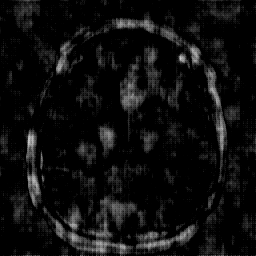

In [57]:
@show Gray.(abs.(X) ./ maximum(abs.(X)) .- 0.2)
# @show(maximum(abs.(X)))

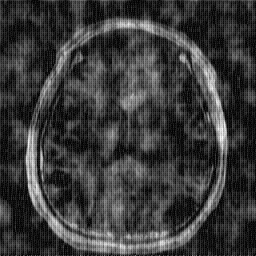

In [274]:
@show Gray.(abs.(X) ./ maximum(abs.(X)))

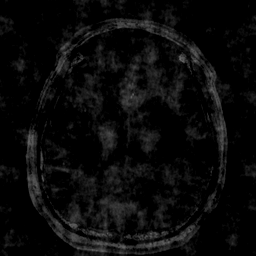

In [58]:
@show Gray.(PΩ_F_adjoint(PΩ_F(X0)))

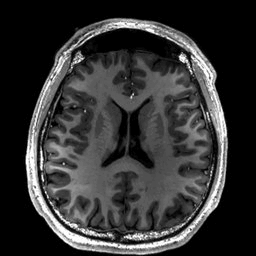

In [256]:
@show Gray.(X0)

In [48]:
@show norm(X0 - X)

64.03767057521722

In [201]:
@show norm(X0 - (PΩ_F_adjoint(PΩ_F(X0))))

42.339740649554

In [116]:
identity = Matrix{Float64}(I, 256, 256)
left_exp = PΩ_F_adjoint(PΩ_F(identity));
left_exp += D_1_adj(D_1(identity));
left_exp += D_2_adj(D_2(identity));
left_exp += D_3_adj(D_3(identity));
left_exp += D_4_adj(D_4(identity));
left_exp += identity
left_exp += identity
left_inv = inv(left_exp);

@show left_exp

256×256 Matrix{Float64}:
  4.27344      -1.99233      -1.00063     …  -0.000628125   0.00767294
 -1.99233       8.27344      -1.99233         0.0245926    -0.000628125
 -0.000628125  -1.99233       8.27344        -0.0160486     0.0245926
  0.0245926    -1.00063      -1.99233         0.0122856    -0.0160486
 -0.0160486     0.0245926    -1.00063        -0.0262616     0.0122856
  0.0122856    -0.0160486     0.0245926   …  -0.00756707   -0.0262616
 -0.0262616     0.0122856    -0.0160486       0.0315054    -0.00756707
 -0.00756707   -0.0262616     0.0122856       0.0292365     0.0315054
  0.0315054    -0.00756707   -0.0262616      -0.00240041    0.0292365
  0.0292365     0.0315054    -0.00756707      0.00340744   -0.00240041
  ⋮                                       ⋱                 ⋮
  0.0292365    -0.00240041    0.00340744     -0.00756707    0.0315054
  0.0315054     0.0292365    -0.00240041     -0.0262616    -0.00756707
 -0.00756707    0.0315054     0.0292365       0.0122856    -0.02626